In [23]:
import pandas as pd
import numpy as np
from scipy import stats

def clean_data(input_filename, output_filename):
    df = pd.read_csv(input_filename)

    df.dropna()

    z_scores = np.abs(stats.zscore(df))
    df = df[(z_scores < 3).all(axis=1)]

    df = df.apply(lambda x: x.fillna('0') if pd.api.types.is_numeric_dtype(x) else x)

    min_len = min(len(df['Before']),len(df['After']))
    df = df.iloc[:min_len]

    # Save the cleaned dataframe to a new CSV file
    df.to_csv(output_filename, index=False)
    

clean_data('Intention/DIT.csv','Intention/Cleaned Data/DIT_Cleaned.csv')    

In [3]:

filenames = [('Intention/CBO.csv','Intention/Cleaned Data/CBO_Cleaned.csv'),
             ('Intention/DIT.csv','Intention/Cleaned Data/DIT_Cleaned.csv'),
             ('Intention/LCOM.csv','Intention/Cleaned Data/LCOM_Cleaned.csv'),
             ('Intention/LOC.csv','Intention/Cleaned Data/LOC_Cleaned.csv'),
             ('Intention/NOC.csv','Intention/Cleaned Data/NOC_Cleaned.csv'),
             ('Intention/RFC.csv','Intention/Cleaned Data/RFC_Cleaned.csv'),
             ('Intention/WMC.csv','Intention/Cleaned Data/WMC_Cleaned.csv'),
             
             ('Operation/CBO.csv','Operation/Cleaned Data/CBO_Cleaned.csv'),
             ('Operation/DIT.csv','Operation/Cleaned Data/DIT_Cleaned.csv'),
             ('Operation/LCOM.csv','Operation/Cleaned Data/LCOM_Cleaned.csv'),
             ('Operation/LOC.csv','Operation/Cleaned Data/LOC_Cleaned.csv'),
             ('Operation/NOC.csv','Operation/Cleaned Data/NOC_Cleaned.csv'),
             ('Operation/RFC.csv','Operation/Cleaned Data/RFC_Cleaned.csv'),
             ('Operation/WMC.csv','Operation/Cleaned Data/WMC_Cleaned.csv')            
            ]


for input_filename, output_filename in filenames:
    clean_data(input_filename, output_filename)

In [20]:
import os
import matplotlib.pyplot as plt
def boxplot(output_filename):
  
    df_plot = pd.read_csv(output_filename)
  
    fig, ax = plt.subplots()
    ax.boxplot([df_plot['Before'],df_plot['After']])
    ax.set_xticklabels(['Before','After'])
    ax.set_ylabel('Data Values')
    ax.set_xlabel(output_filename[:-4])
    ax.set_title('Box Plot')
    plt.show()


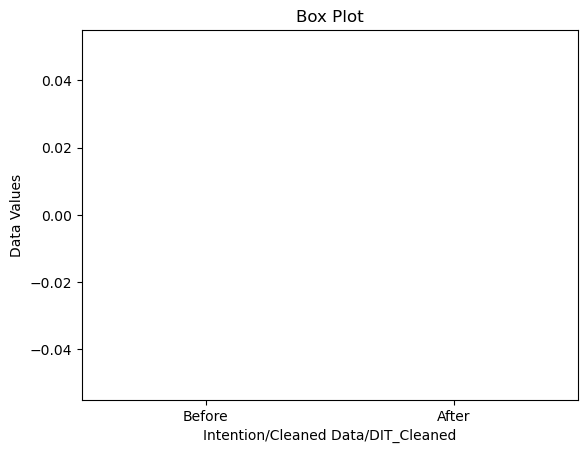

In [22]:
#Box Plot of Intention

# #CBO
# boxplot('Intention/Cleaned Data/CBO_Cleaned.csv')

# #DIT
boxplot('Intention/Cleaned Data/DIT_Cleaned.csv')

# #LCOM
# boxplot('Intention/Cleaned Data/LCOM_Cleaned.csv')

# #LOC
# boxplot('Intention/Cleaned Data/LOC_Cleaned.csv')

# #NOC
# boxplot('Intention/Cleaned Data/NOC_Cleaned.csv')

# #RFC
# boxplot('Intention/Cleaned Data/RFC_Cleaned.csv')

# #WMC
# boxplot('Intention/Cleaned Data/WMC_Cleaned.csv')
